<a href="https://colab.research.google.com/github/DataAnalystPL/Data_analysis/blob/main/Marketing_campaign_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign - data analysis
data source: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/marketing_campaign.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,3,8,10,4,7,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,5,3,6,5,0,0


In [4]:
df.shape

(2240, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

# EDA

In [6]:
import matplotlib
matplotlib.style.use('ggplot')

## palette

In [7]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#954C41', '#E56F3E']

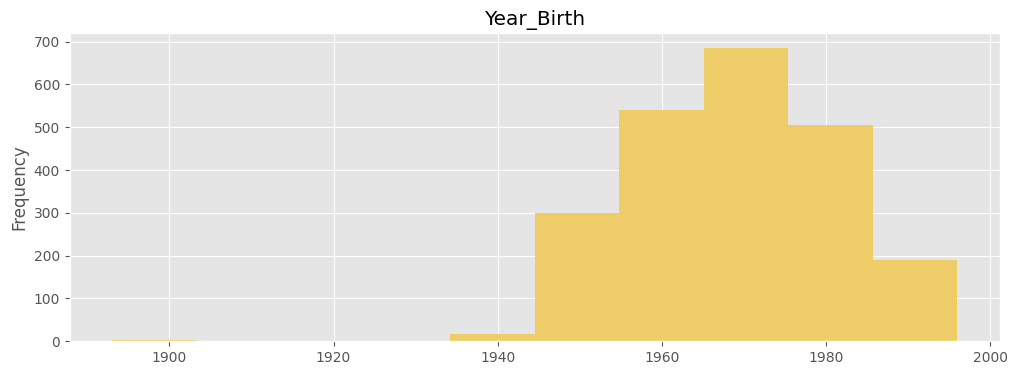

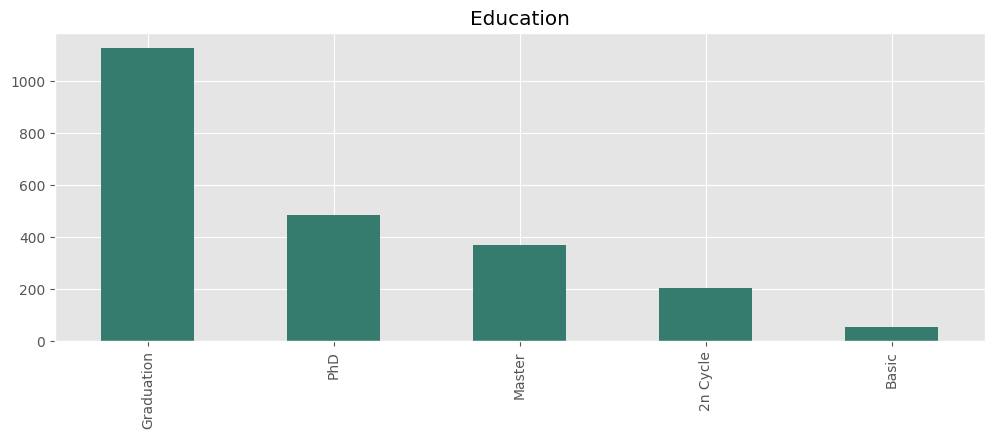

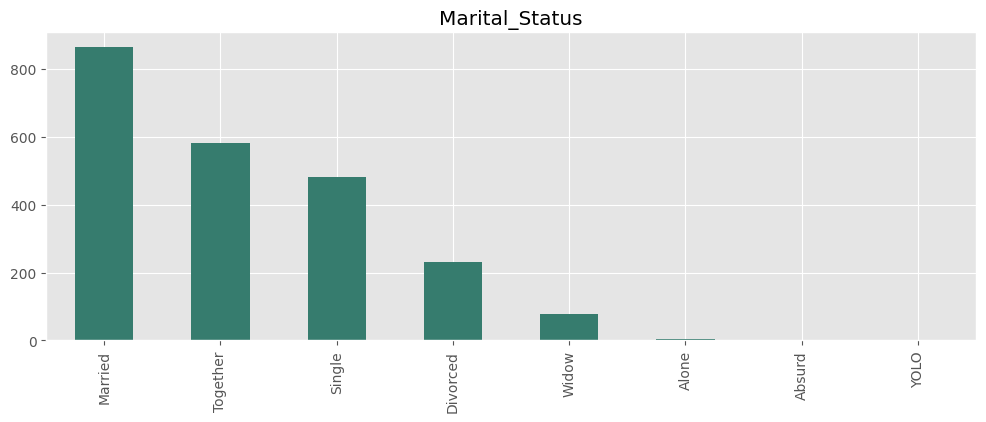

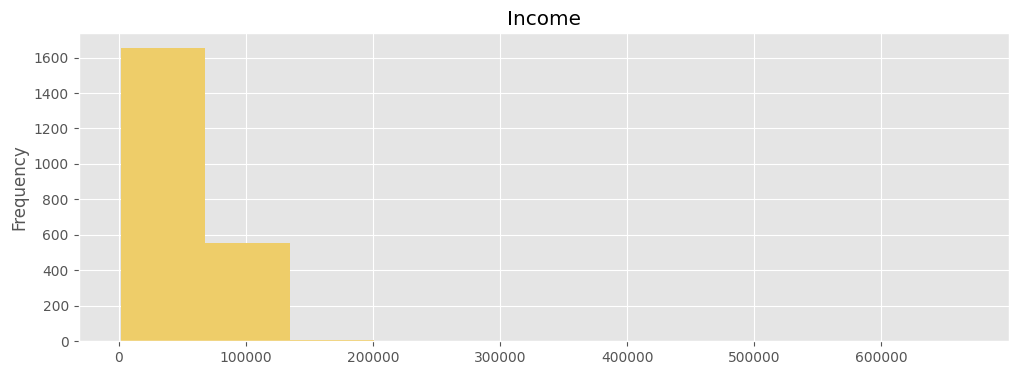

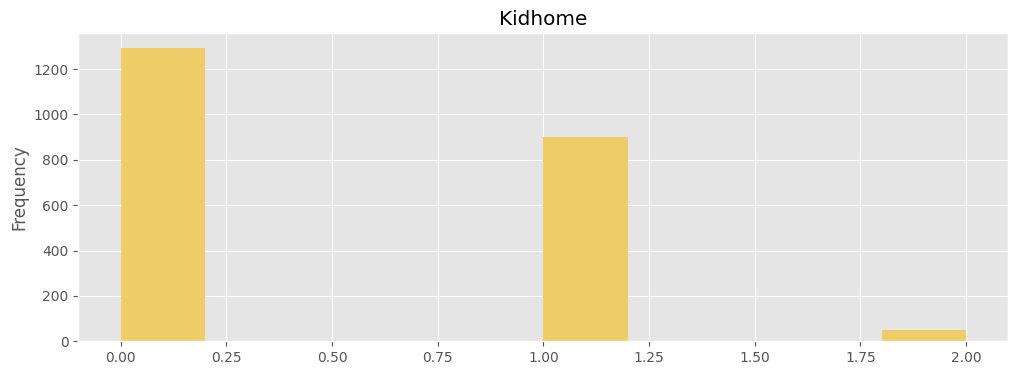

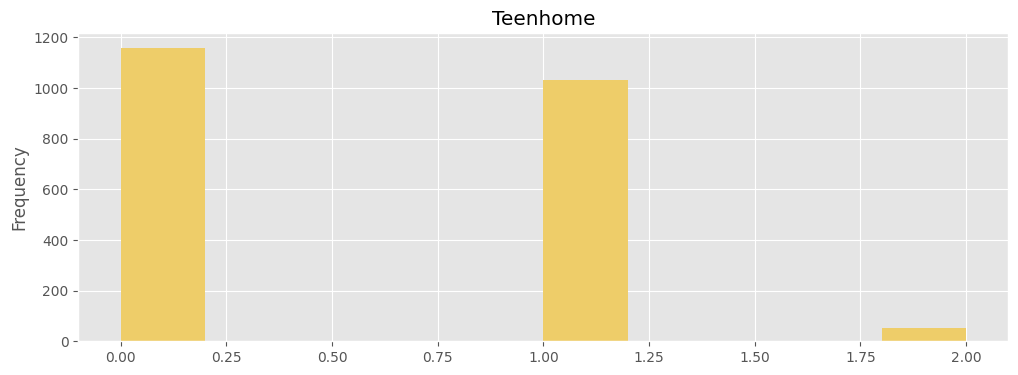

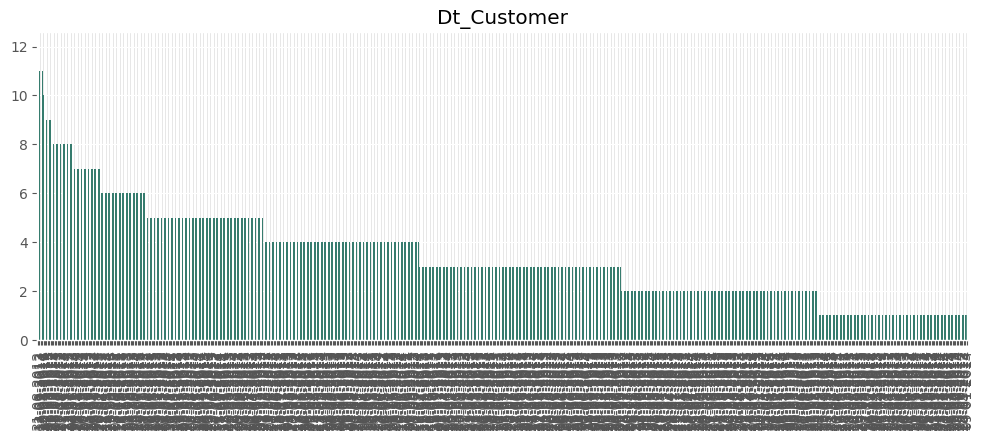

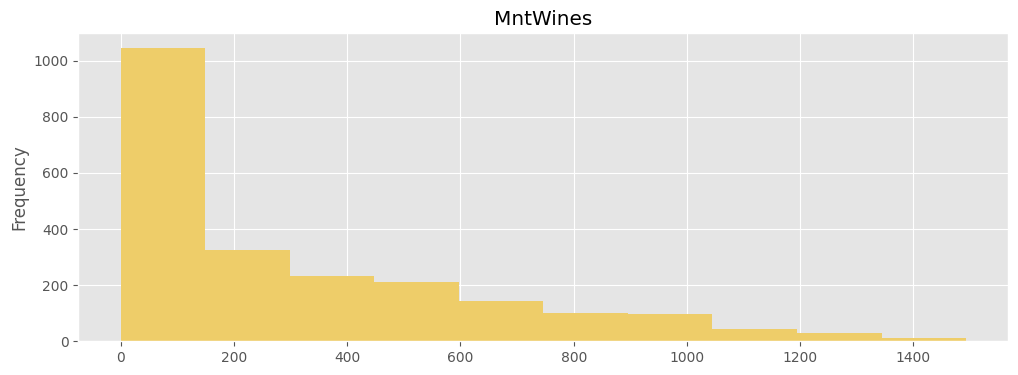

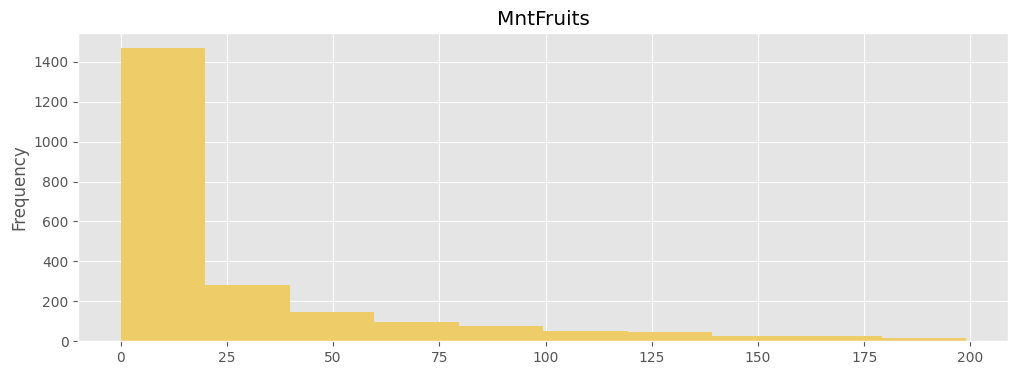

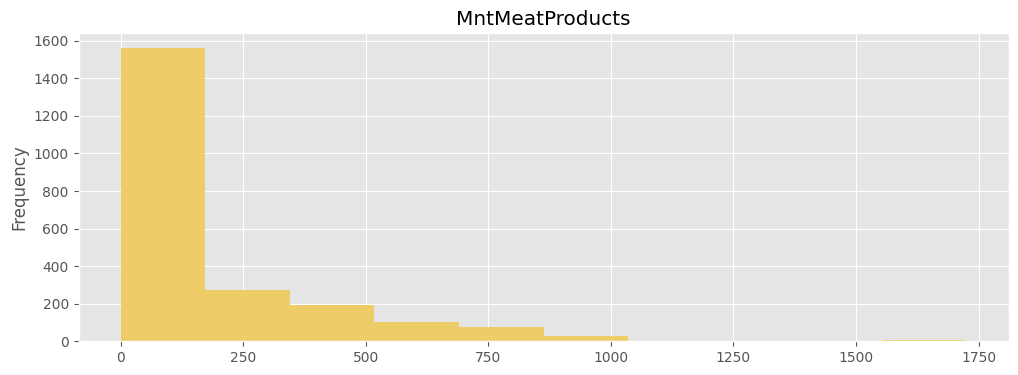

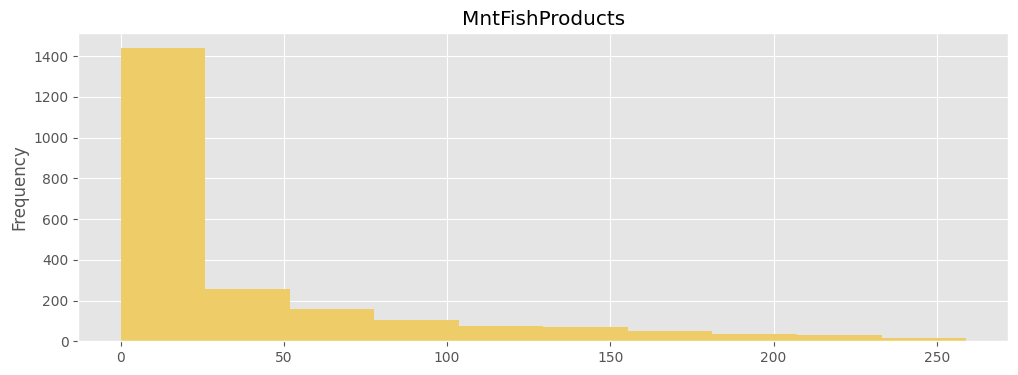

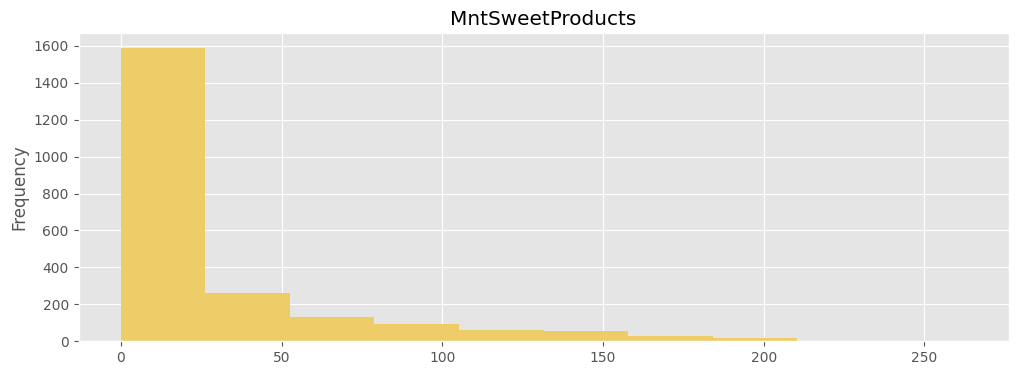

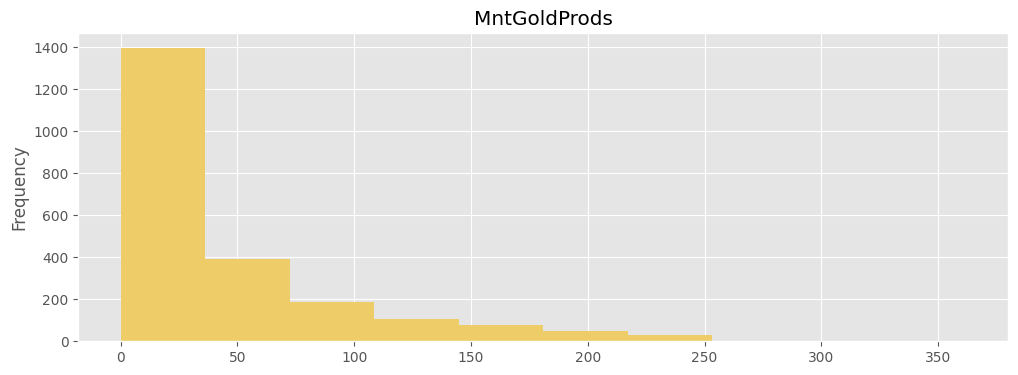

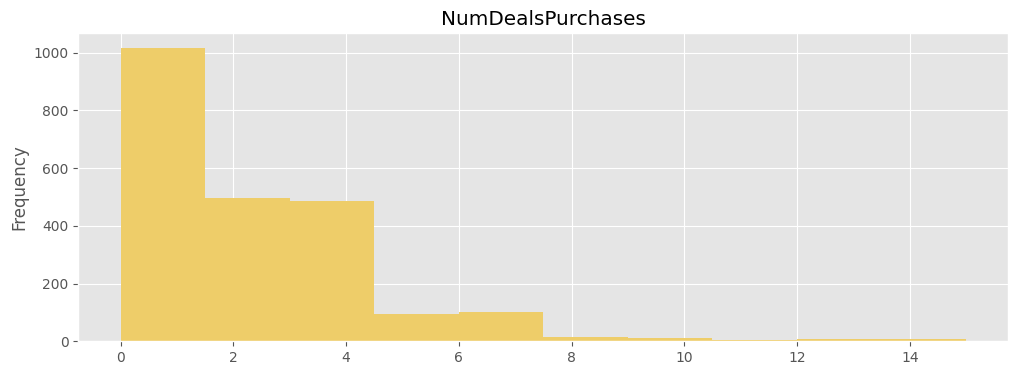

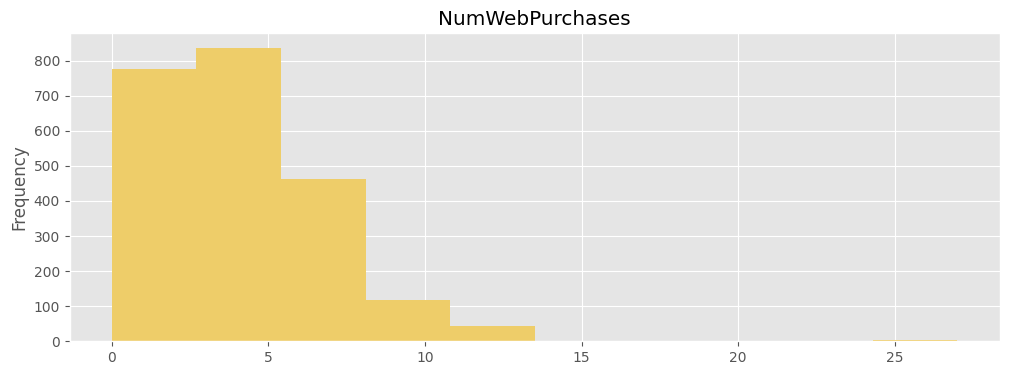

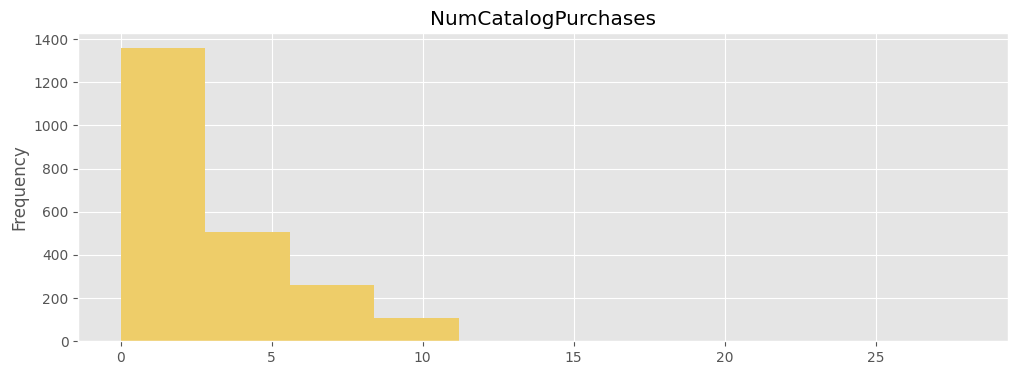

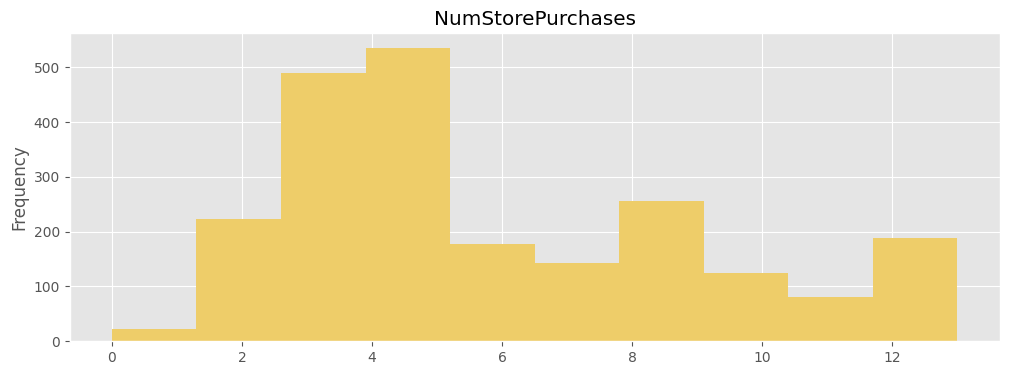

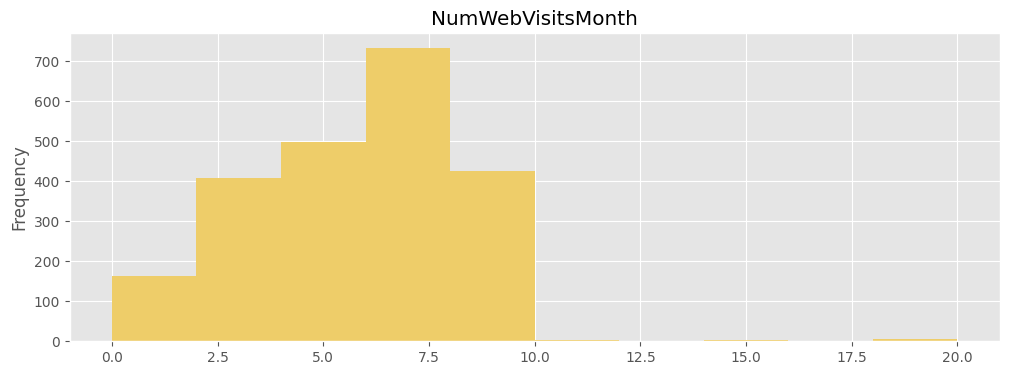

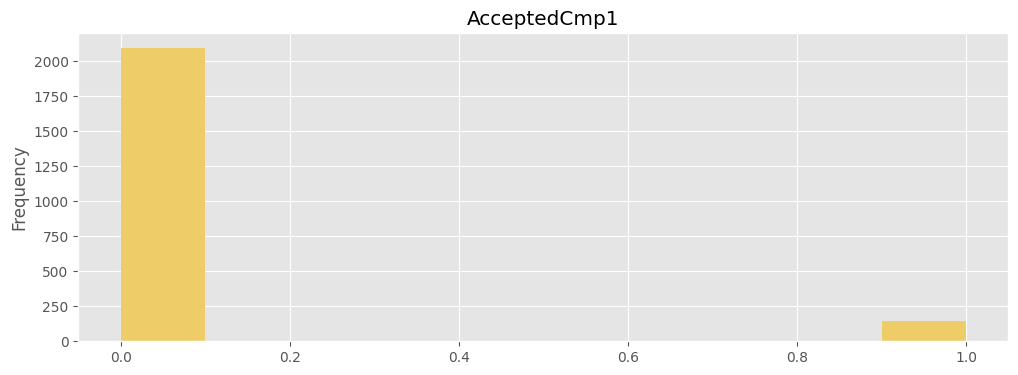

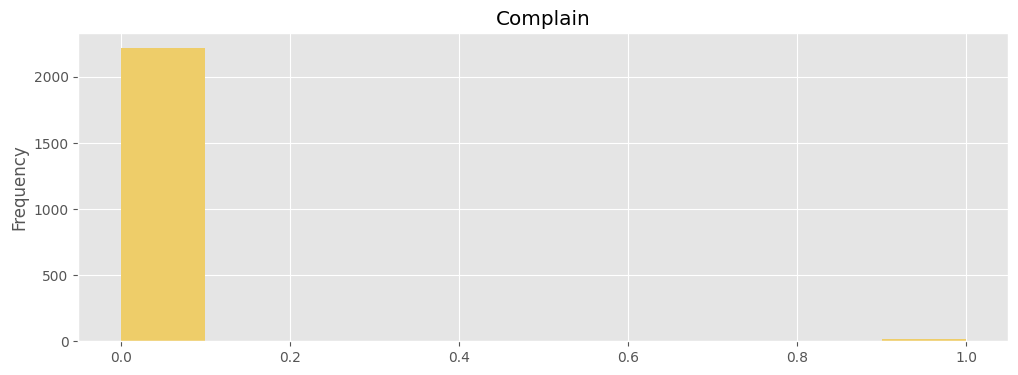

In [9]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    df[feat].value_counts().plot(kind='bar', figsize=(12,4), title=feat, color=palette[0])
  else:
    df[feat].plot(kind='hist', figsize=(12,4), title=feat, color=palette[1])
  plt.show()

In [10]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

**Observations**

* YearBirth - outlier left side
* Education - 5 classed reduce dimenson
* Income - outliers right side
* Kidhome - 3 classes
* Teenhome - 3 classes
* DTcustomer - datetime need to correct
* MntWines - exponential distribution
* MntFruits - exponential distribution
* MntMeatProducts - exponential distribution
* MntFishProducts - exponential distribution
* MntSweetProducts - exponential distribution
* MntGoldProducts - exponential distribution
* NumDealsPurchases - exponential distribution
* NumWebPurchases - semi-exponential distribution
* NumCatalogPurchases - exponential distribution
* NumStorePurchases - abnorml uniform distribution
* NumWebVisitsMonth - outliers right side
* AcceptedCmp1 - 2 classes imbalanced in favor of class 0
* Complain - 2 classes imbalanced in favor of class 0

# Preprocessing

# engineer month feature

In [11]:
df['Month'] = pd.DatetimeIndex(df['Dt_Customer']).month

<ipython-input-11-d45b597c419e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.DatetimeIndex(df['Dt_Customer']).month


In [12]:
df['Month'].value_counts()

8     211
10    209
3     202
12    202
5     192
1     191
2     187
11    185
4     184
6     170
9     166
7     141
Name: Month, dtype: int64

# Treating Income Outlier

In [13]:
df[df['Income'] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Month
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,9,14,18,...,1,12,4,3,1,3,6,0,0,2


In [14]:
df['Income'] = df['Income'].replace(666666.0, 66666.0)

In [15]:
df[df['Income'] > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Month


# Analysis by Income

<Axes: xlabel='Income'>

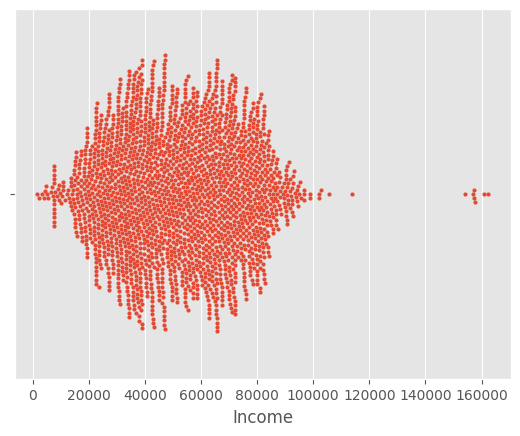

In [16]:
sns.swarmplot(data=df, x='Income', s = 3)

# Income_cat

In [ ]:
maxv = df['Income'].max()
minv = df['Income'].min()
bns = [minv, 35000, 65000, 85000, maxv]
df['Income_cat'] = pd.cut(df['Income'], bins=bns, labels=bns[:-1])

In [ ]:
df.groupby('Income_cat').mean()

<ipython-input-17-fd354b25eeb3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Income_cat').mean()


,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Month
Income_cat,,,,,,,,,,,,,,,,,,
1730.0,1974.027372,25138.563869,0.791971,0.250000,21.361314,5.950730,22.324818,8.591241,5.833942,16.266423,2.023723,2.003650,0.472628,2.961679,6.974453,0.000000,0.009124,6.381387
35000.0,1966.811302,49683.932392,0.493441,0.754793,249.109990,16.591322,88.812311,22.967709,16.134208,41.374369,2.972755,4.365288,1.970737,5.610494,5.878910,0.016145,0.011100,6.589304
65000.0,1966.975862,74108.360345,0.086207,0.381034,603.806897,56.301724,371.308621,82.541379,58.263793,71.684483,1.679310,5.387931,5.298276,8.531034,3.289655,0.153448,0.008621,6.674138
85000.0,1970.958333,95652.291667,0.062500,0.145833,701.041667,62.979167,567.229167,83.968750,72.041667,61.802083,1.093750,5.250000,6.604167,7.541667,2.197917,0.385417,0.000000,5.614583


# distributions by Income_cat


In [ ]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#954C41', '#E56F3E']

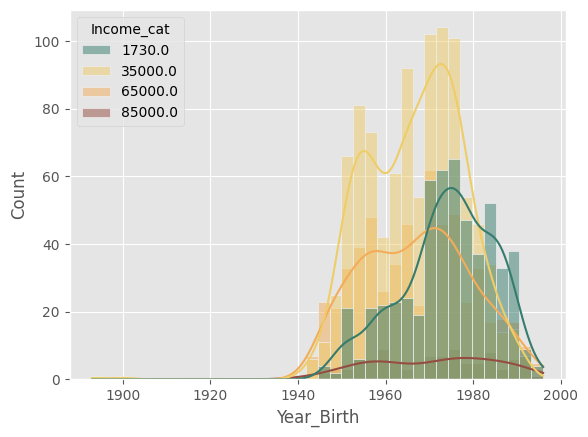

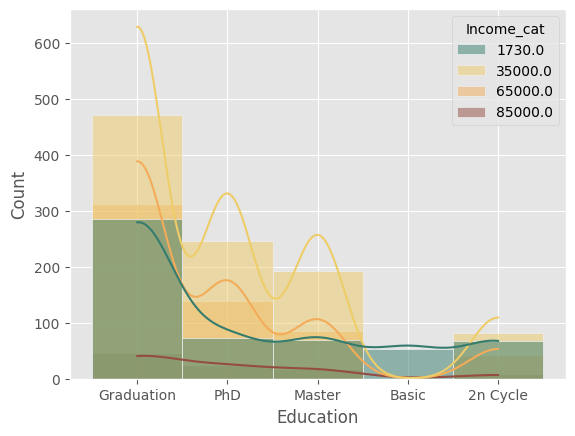

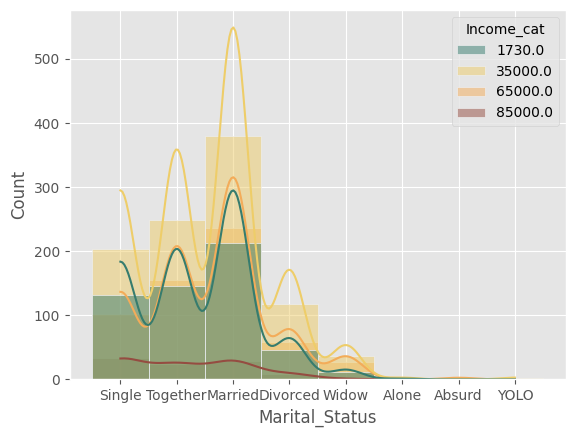

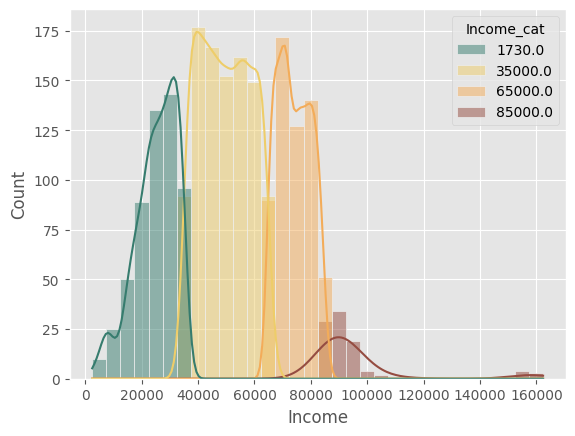

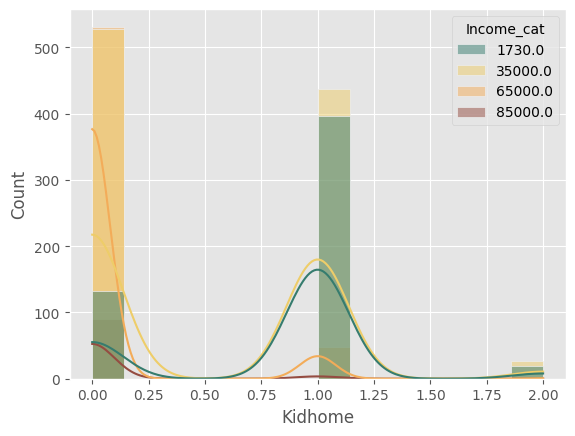

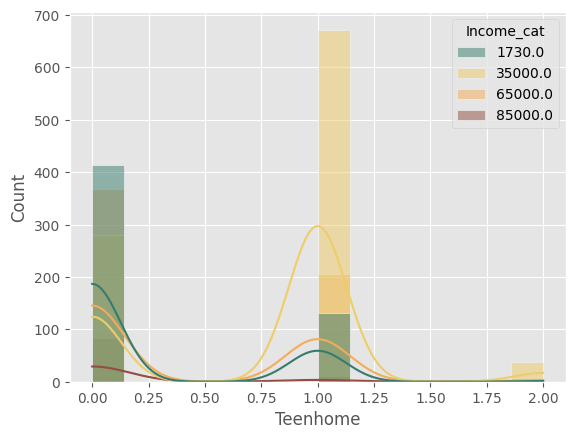

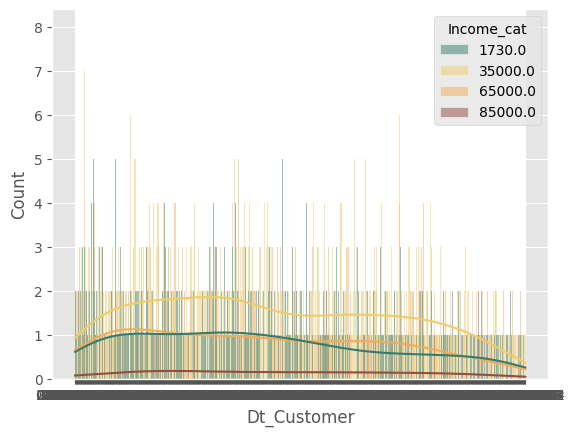

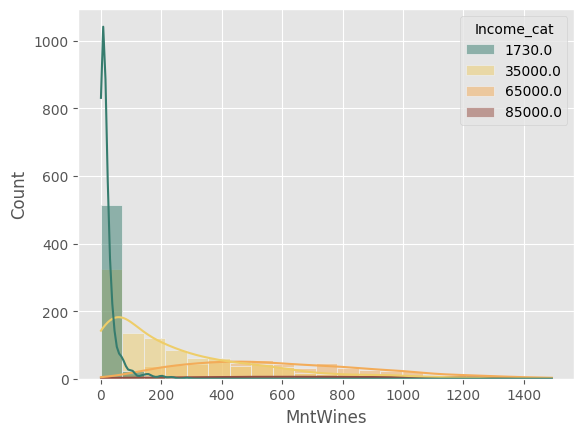

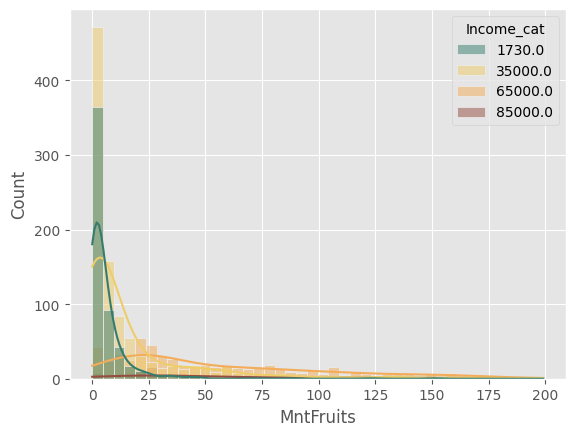

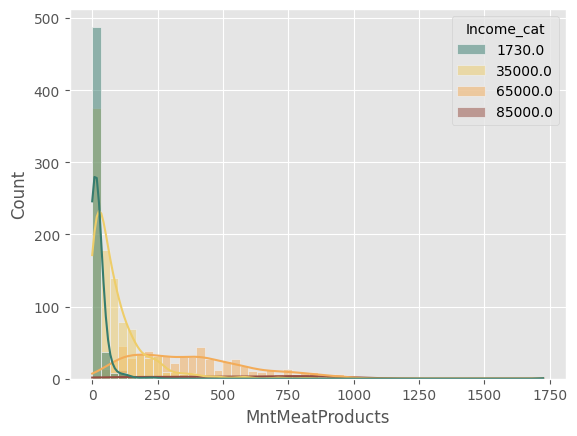

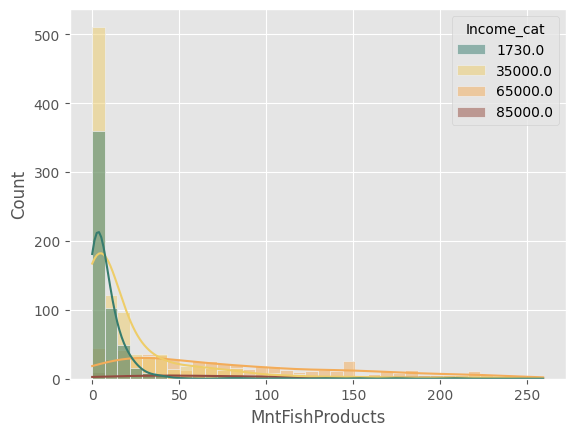

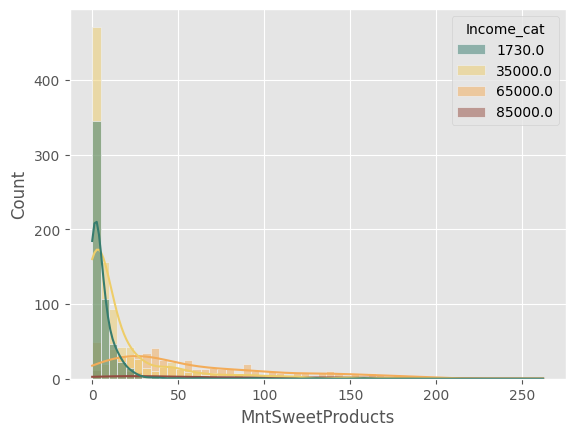

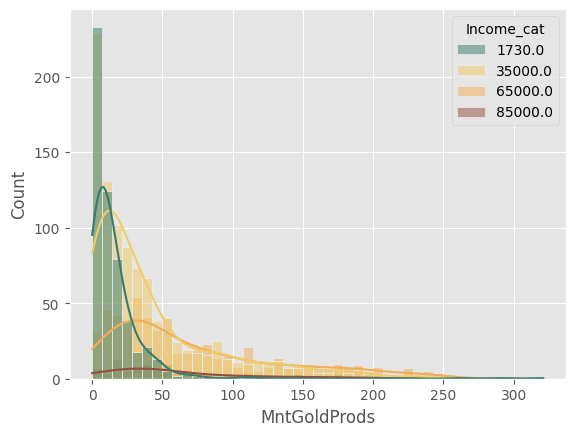

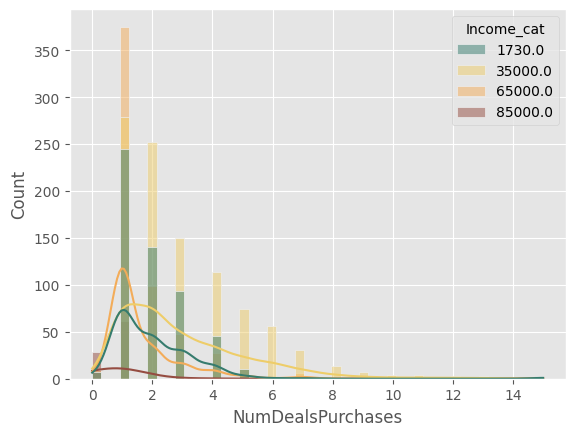

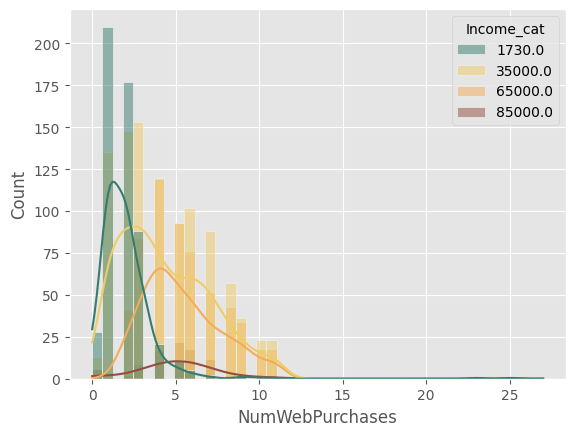

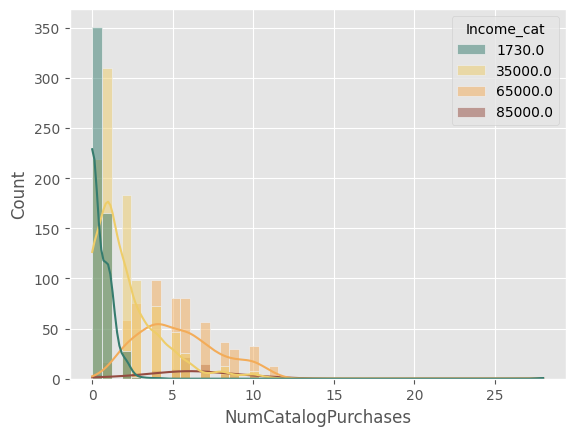

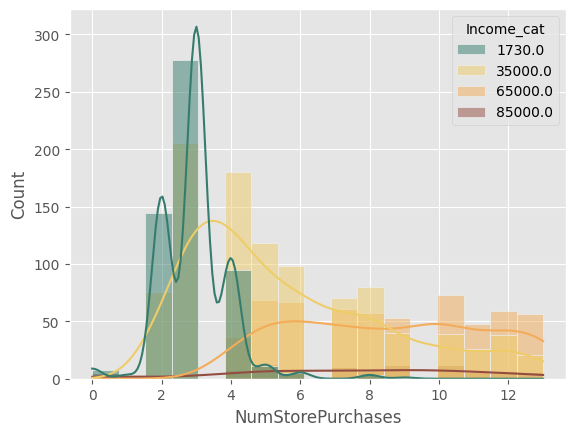

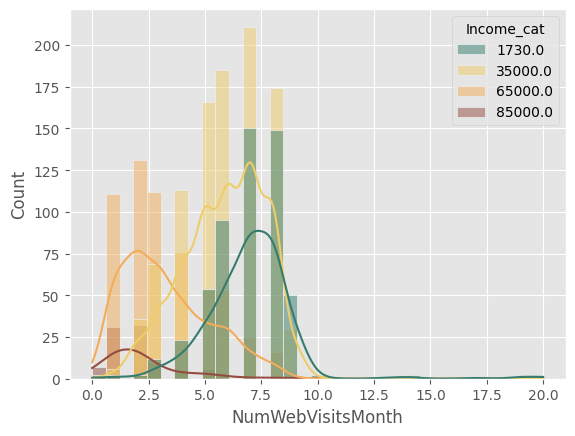

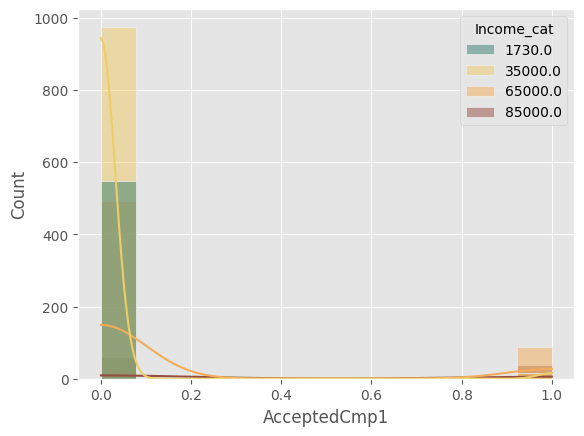

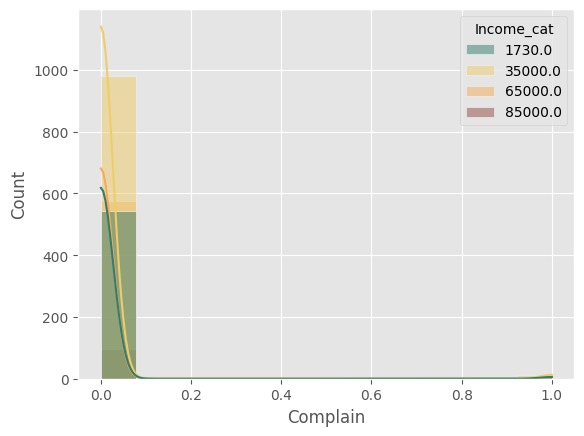

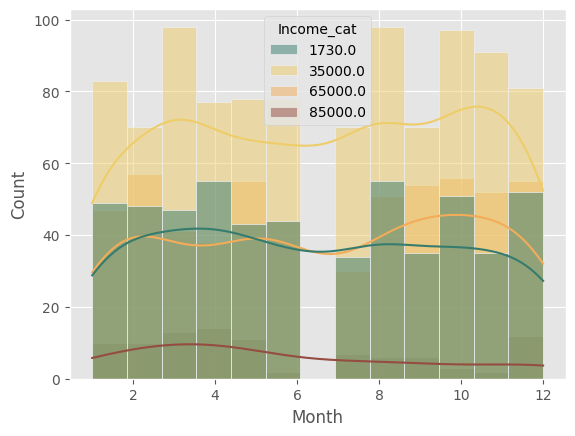

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7c22429e5a20> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7c22429e4ca0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for feat in df.columns:
  if (df[feat].dtype != 'object') | (feat != 'Income_cat') | (feat != 'Month'):
    sns.histplot(data=df, x=feat, hue='Income_cat', palette=palette[:4], kde=True)
    plt.show()

In [ ]:
df.groupby('Income_cat').mean()

<ipython-input-21-fd354b25eeb3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Income_cat').mean()


,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Month
Income_cat,,,,,,,,,,,,,,,,,,
1730.0,1974.027372,25138.563869,0.791971,0.250000,21.361314,5.950730,22.324818,8.591241,5.833942,16.266423,2.023723,2.003650,0.472628,2.961679,6.974453,0.000000,0.009124,6.381387
35000.0,1966.811302,49683.932392,0.493441,0.754793,249.109990,16.591322,88.812311,22.967709,16.134208,41.374369,2.972755,4.365288,1.970737,5.610494,5.878910,0.016145,0.011100,6.589304
65000.0,1966.975862,74108.360345,0.086207,0.381034,603.806897,56.301724,371.308621,82.541379,58.263793,71.684483,1.679310,5.387931,5.298276,8.531034,3.289655,0.153448,0.008621,6.674138
85000.0,1970.958333,95652.291667,0.062500,0.145833,701.041667,62.979167,567.229167,83.968750,72.041667,61.802083,1.093750,5.250000,6.604167,7.541667,2.197917,0.385417,0.000000,5.614583


# Cumulative distributions


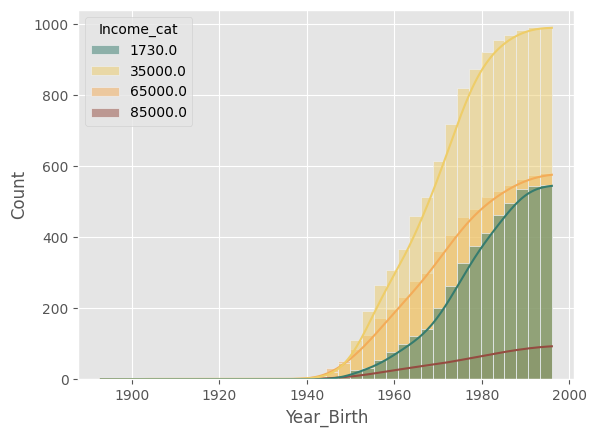

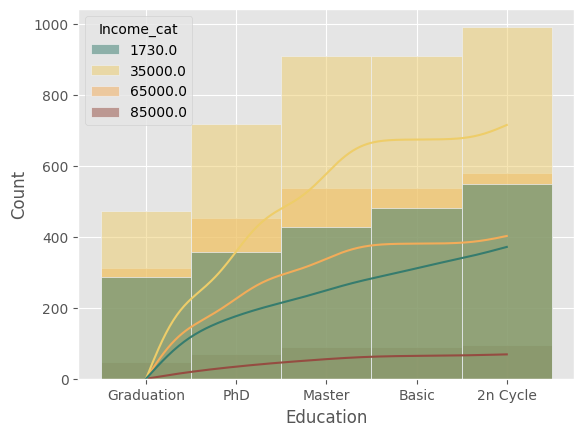

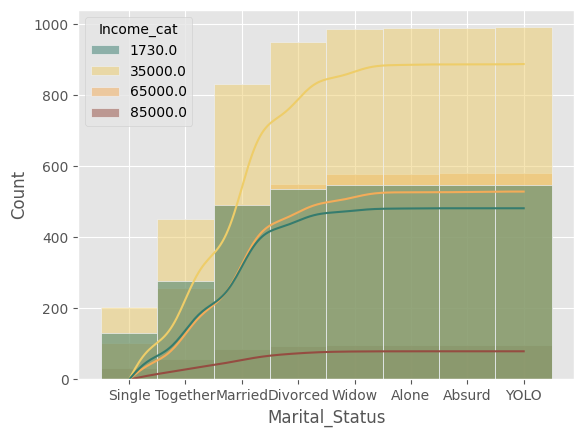

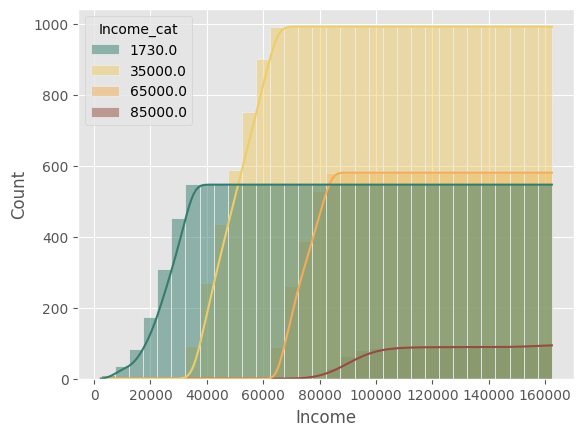

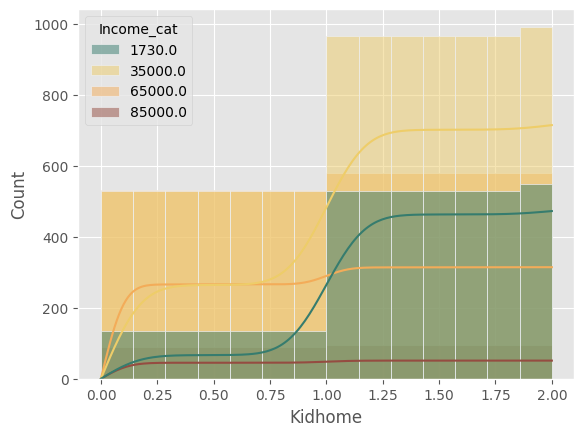

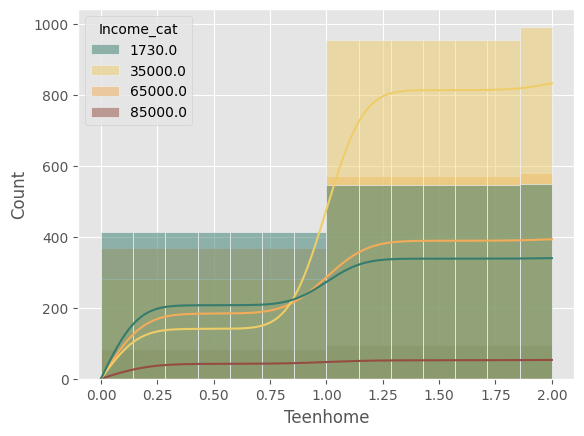

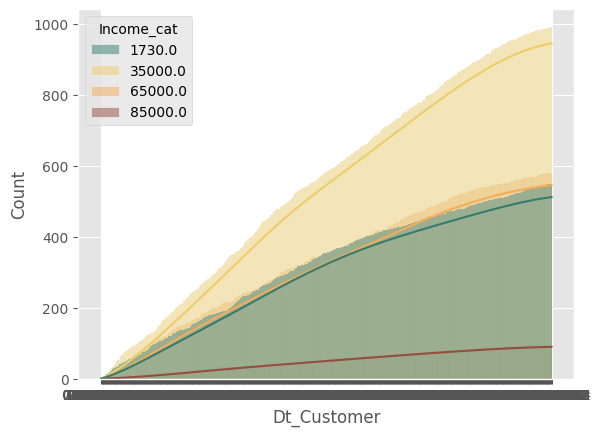

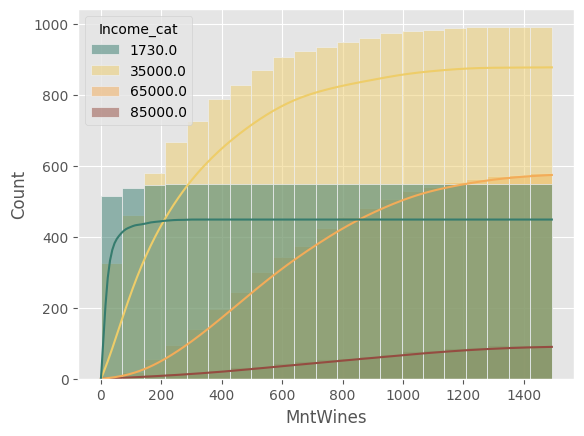

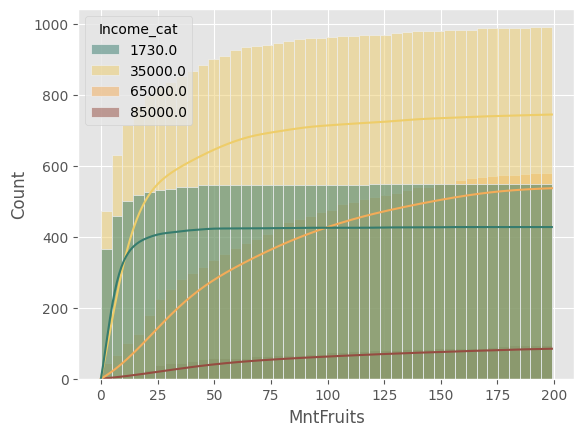

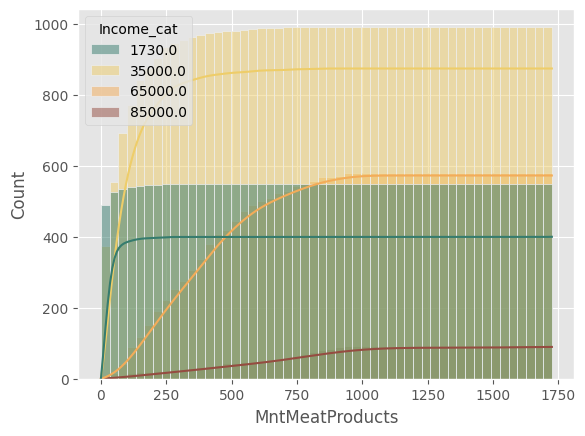

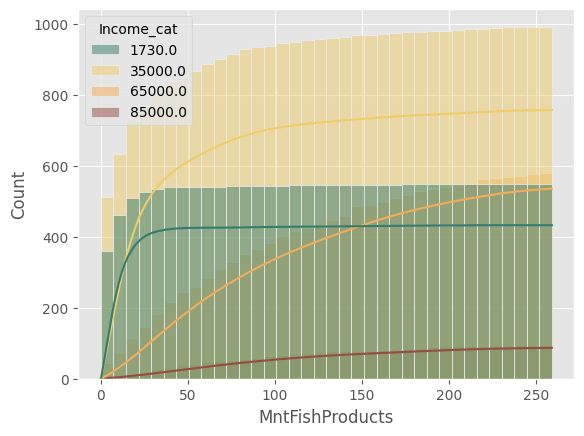

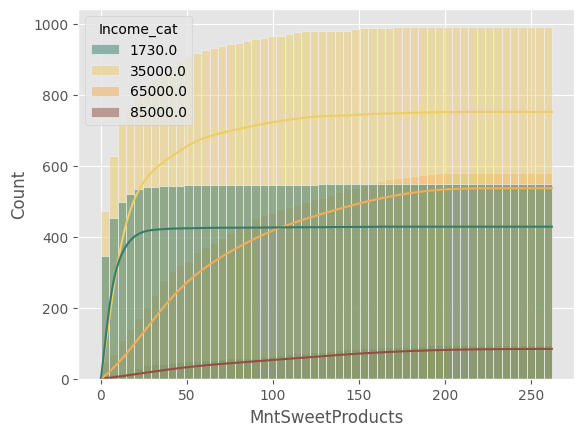

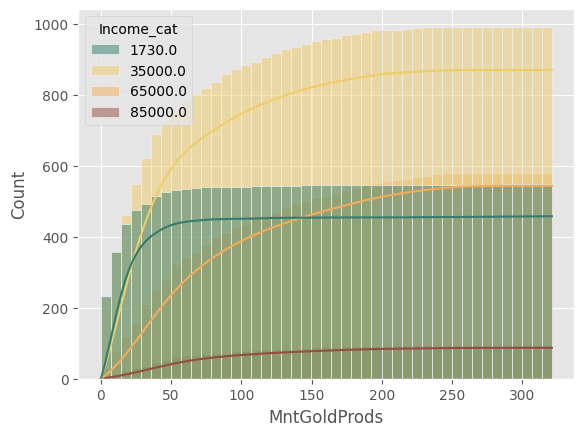

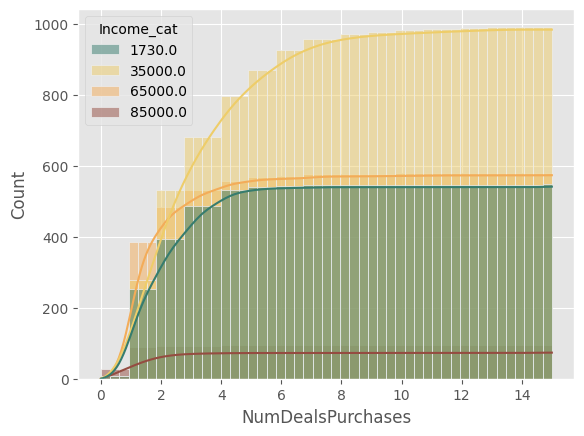

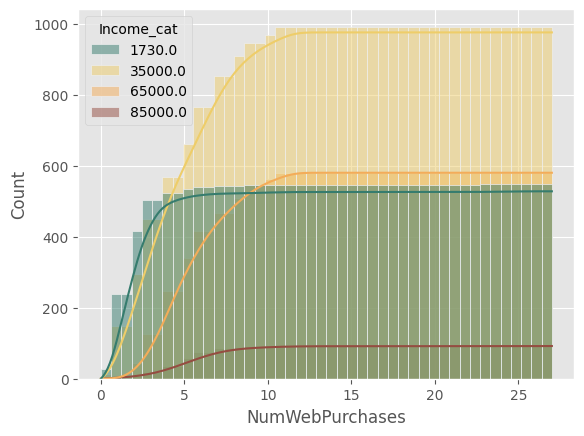

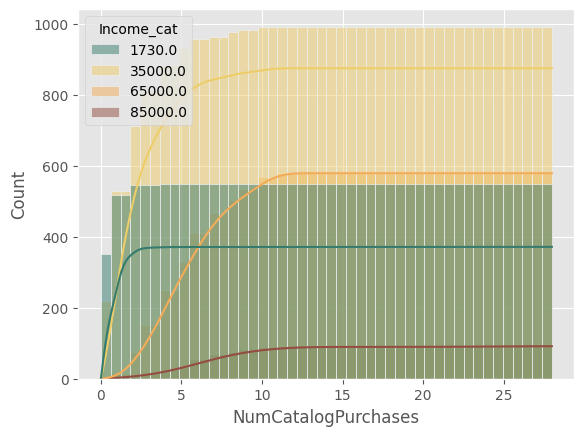

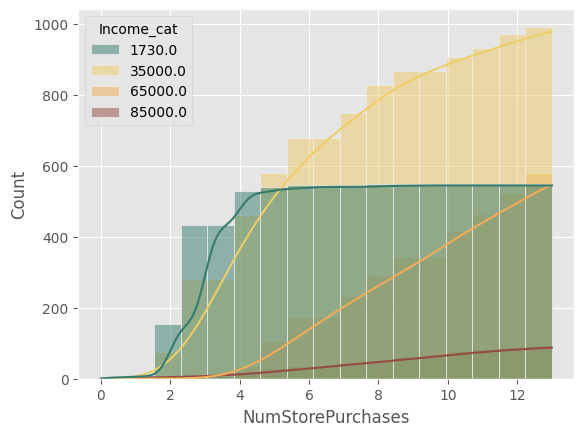

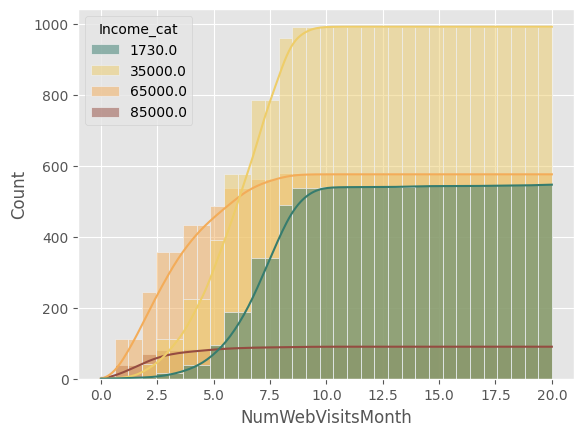

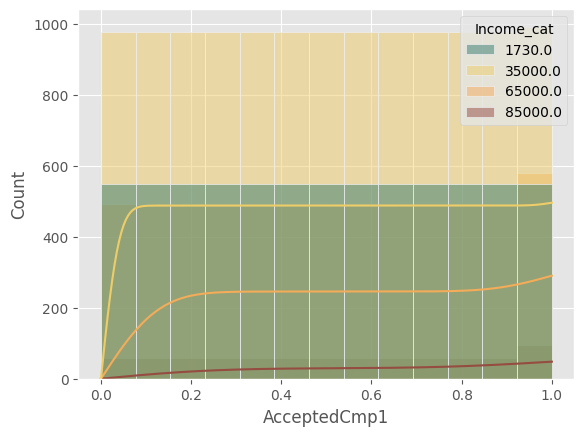

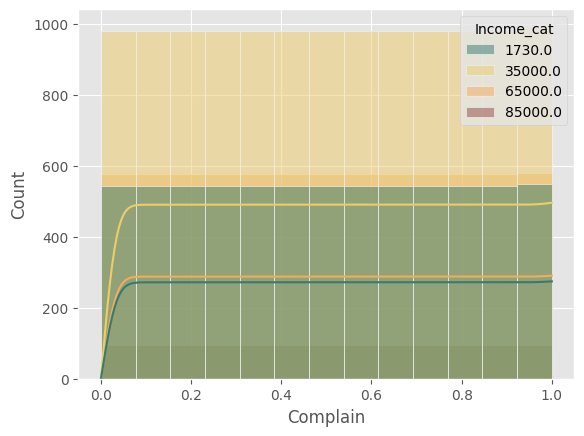

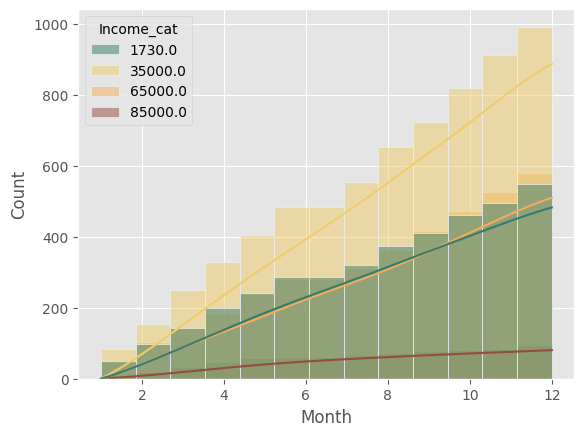

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7c22429e4ca0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
for feat in df.columns:
  if(df[feat].dtype != 'object') | (feat != 'Income_cat') | (feat != 'Month'):
    sns.histplot(data=df, x=feat, hue='Income_cat', palette=palette[:4], kde=True, cumulative=True)
    plt.show()

In [ ]:
df.corrwith(df['Income']).sort_values(ascending=False)

<ipython-input-23-a9e2b9e3abcb>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Income']).sort_values(ascending=False)


Income                 1.000000
NumCatalogPurchases    0.696241
MntMeatProducts        0.692119
MntWines               0.687807
NumStorePurchases      0.629959
MntSweetProducts       0.523448
MntFishProducts        0.520095
MntFruits              0.507799
NumWebPurchases        0.458626
MntGoldProds           0.388940
AcceptedCmp1           0.327047
Teenhome               0.034066
Month                 -0.000044
Complain              -0.030610
NumDealsPurchases     -0.108158
Year_Birth            -0.197812
Kidhome               -0.514435
NumWebVisitsMonth     -0.650398
dtype: float64

**Observations**

+ Year_Birth - noticable weight for lowest incomes to be from later years, 2nd and 3rd quartile income from earlier years. Top quartile dispursed across birth year.
+ Phd and Masters how a higher proportion of higher incomes
+ Marital_status - appears to have no relationship with income
+ Kidhome - The top income quartile shows mostly no children.  3rd quartile shows weights towars no children.  1st and 2nd quartiles show weight to atleast one child at home.
+ Teenhome - 4th quartile shows mostly no children.  1st quartile shows weight to no children.  2nd quartile has high porportion of 1 or more teens at home.
+ MntWines - **3rd quartile shows high variance of highest amount of purchases**.
+ MntFruits - 3rd quartile shows high variances of highest amounts purchased.
+ MntMeatProducts - **extreme right side outliers from 1st income quartile**.  3rd quartile again shows high variance of highest purchases.
+ MntFishProducts - Outliers in all income groups.
+ MntSweetProducts - **appears to have moderate positive correlation with income**
+ MntGoldProducts - 3rd quartile purchases 10 more than the 4th quartile, 71 versus 61.  
+ NumDealsPurchase - **2nd quartile has a slight weight to more purchases than rest.**
+ NumWebPurchases - **2nd and 3rd have weight to higher  purchases**
+ NumCatalogPurchases - **3rd and 4th quartile 5x and 6x higher on avg**
+ NumStorePurchases - **1st quartile shows distinctly low purchases.  4th quartile shows large variance.**
+ NumWebVisitsMonth - **1st and 2nd quartile show high activity and 3rd nd 4th group show low usage**
+ Complain - **no complaints by top income group, most complaints come from 2nd income group**
+ Month - **No seasonality detected by month**

*Correlations with Income*

+ **NumCatalogPurchases, MntMeatProducts, MntWines, NumStorePurchases.  Show moderate positive relationship with income.**
+ **NumWebVisitsMonth shows moderate negative correlation with income**

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'Complain',
       'Month', 'Income_cat'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   object  
 2   Marital_Status       2240 non-null   object  
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   int64   
 5   Teenhome             2240 non-null   int64   
 6   Dt_Customer          2240 non-null   object  
 7   MntWines             2240 non-null   int64   
 8   MntFruits            2240 non-null   int64   
 9   MntMeatProducts      2240 non-null   int64   
 10  MntFishProducts      2240 non-null   int64   
 11  MntSweetProducts     2240 non-null   int64   
 12  MntGoldProds         2240 non-null   int64   
 13  NumDealsPurchases    2240 non-null   int64   
 14  NumWebPurchases      2240 non-null   int64   
 15  NumCatalogPurchases  

## Products by number of children at home

In [ ]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Kidhome']].groupby('Kidhome').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,451.173241,39.392885,253.996133,56.162413,40.498840,60.037123
1,104.403782,8.517241,48.862069,12.311457,8.932147,22.408231
2,74.791667,6.770833,33.833333,7.729167,4.708333,17.416667


In [ ]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Kidhome']].groupby('Kidhome').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,583367,50935,328417,72618,52365,77628
1,93859,7657,43927,11068,8030,20145
2,3590,325,1624,371,226,836


In [ ]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Kidhome']].groupby('Kidhome').count()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,1293,1293,1293,1293,1293,1293
1,899,899,899,899,899,899
2,48,48,48,48,48,48


**Observations**

+ **No children at home leads to massive spending on wines, 4.5 times a family with one child**
+ **Gold Products are very popular for families with no children**

## Products by Num fo Teenagers at home

In [ ]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Teenhome']].groupby('Teenhome').mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,304.822971,33.310017,227.120035,48.658031,33.631261,45.256477
1,300.009709,18.866990,101.432039,25.697087,20.233010,42.587379
2,361.942308,17.519231,124.769231,23.903846,16.076923,44.942308


In [ ]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Teenhome']].groupby('Teenhome').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,352985,38573,263005,56346,38945,52407
1,309010,19433,104475,26468,20840,43865
2,18821,911,6488,1243,836,2337


In [ ]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Teenhome']].groupby('Teenhome').count()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,1158,1158,1158,1158,1158,1158
1,1030,1030,1030,1030,1030,1030
2,52,52,52,52,52,52


**Observations**

+ **Wines are major revenue generator across teengaer count**

# Where pruchases are made

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   object  
 2   Marital_Status       2240 non-null   object  
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   int64   
 5   Teenhome             2240 non-null   int64   
 6   Dt_Customer          2240 non-null   object  
 7   MntWines             2240 non-null   int64   
 8   MntFruits            2240 non-null   int64   
 9   MntMeatProducts      2240 non-null   int64   
 10  MntFishProducts      2240 non-null   int64   
 11  MntSweetProducts     2240 non-null   int64   
 12  MntGoldProds         2240 non-null   int64   
 13  NumDealsPurchases    2240 non-null   int64   
 14  NumWebPurchases      2240 non-null   int64   
 15  NumCatalogPurchases  

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'NumDealsPurchases'),
  Text(1, 0, 'NumWebPurchases'),
  Text(2, 0, 'NumCatalogPurchases'),
  Text(3, 0, 'NumStorePurchases'),
  Text(4, 0, 'NumWebVisitsMonth')])

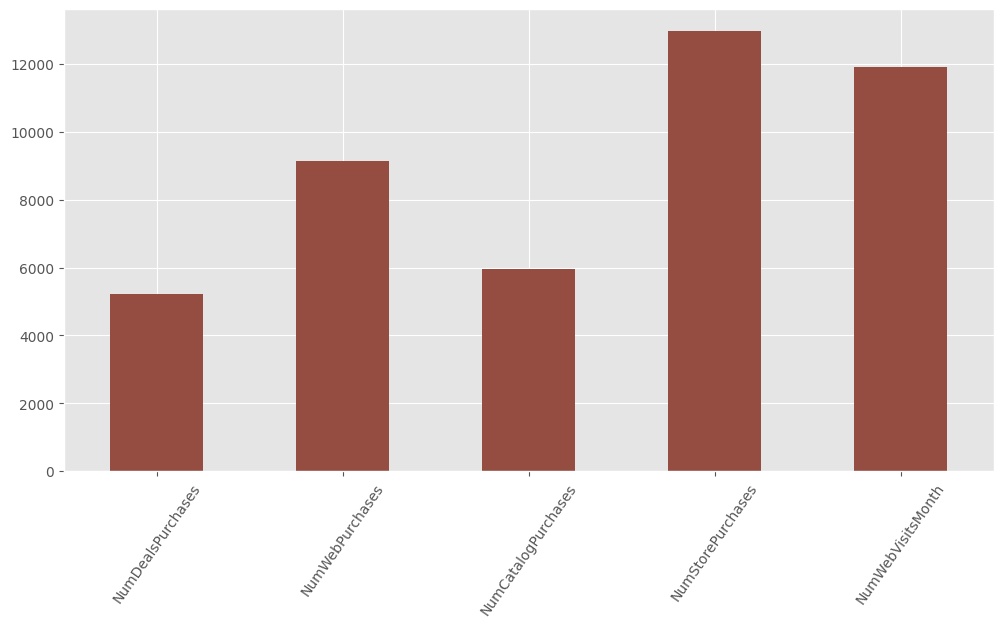

In [ ]:
df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].sum().plot(kind='bar',figsize=(12,6), color=palette[3])
plt.xticks(rotation=55)